In [1]:
import datetime

import os
import json
import gzip

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from fastprogress.fastprogress import master_bar, progress_bar

from matplotlib import pyplot
pyplot.rcParams['figure.dpi'] = 600

In [2]:
input_path = '/run/media/wasserstoff/Fedora Linux New/torrent/raw_data'
file_names = os.listdir(input_path)

In [3]:
class KeyCounter:
    def __init__(self):
        self.n = 0
        self._keys = {}
        
    def add_key(self, key: str):
        self.n += 1
        if key in self._keys:
            self._keys[key] += 1
        else:
            self._keys[key] = 1

    def get_keys(self) -> dict:
        return self._keys

In [4]:
key_counter = KeyCounter()
mb = progress_bar(range(1000))
for i, file_name in zip(mb, file_names[:1000]):
    file_path = os.path.join(input_path, file_name)
    with gzip.open(file_path, "r") as file:
        data = json.loads(file.read())
        for paper in data["items"]:
            for key in paper.keys():
                key_counter.add_key(key)

In [11]:
key_counter.get_keys()

{'URL': 4999999,
 'resource': 4999979,
 'member': 4999208,
 'score': 4999999,
 'created': 4999999,
 'license': 2094438,
 'ISSN': 3660315,
 'container-title': 4609389,
 'issued': 4999999,
 'issue': 3070695,
 'prefix': 4999999,
 'reference-count': 4996796,
 'indexed': 4999999,
 'author': 4054124,
 'DOI': 4999999,
 'is-referenced-by-count': 4996796,
 'published': 4642518,
 'subject': 2980996,
 'published-online': 1868702,
 'content-domain': 4996796,
 'title': 4813325,
 'link': 3614551,
 'source': 4999999,
 'type': 4998534,
 'publisher': 4999212,
 'journal-issue': 3070727,
 'volume': 3317248,
 'references-count': 4996796,
 'issn-type': 3660315,
 'deposited': 4999999,
 'page': 3779381,
 'short-container-title': 3108501,
 'update-policy': 716004,
 'isbn-type': 345097,
 'published-print': 3948028,
 'publisher-location': 430860,
 'reference': 2226349,
 'ISBN': 345097,
 'assertion': 523119,
 'update-to': 9736,
 'alternative-id': 2165539,
 'language': 2803926,
 'abstract': 692091,
 'funder': 298

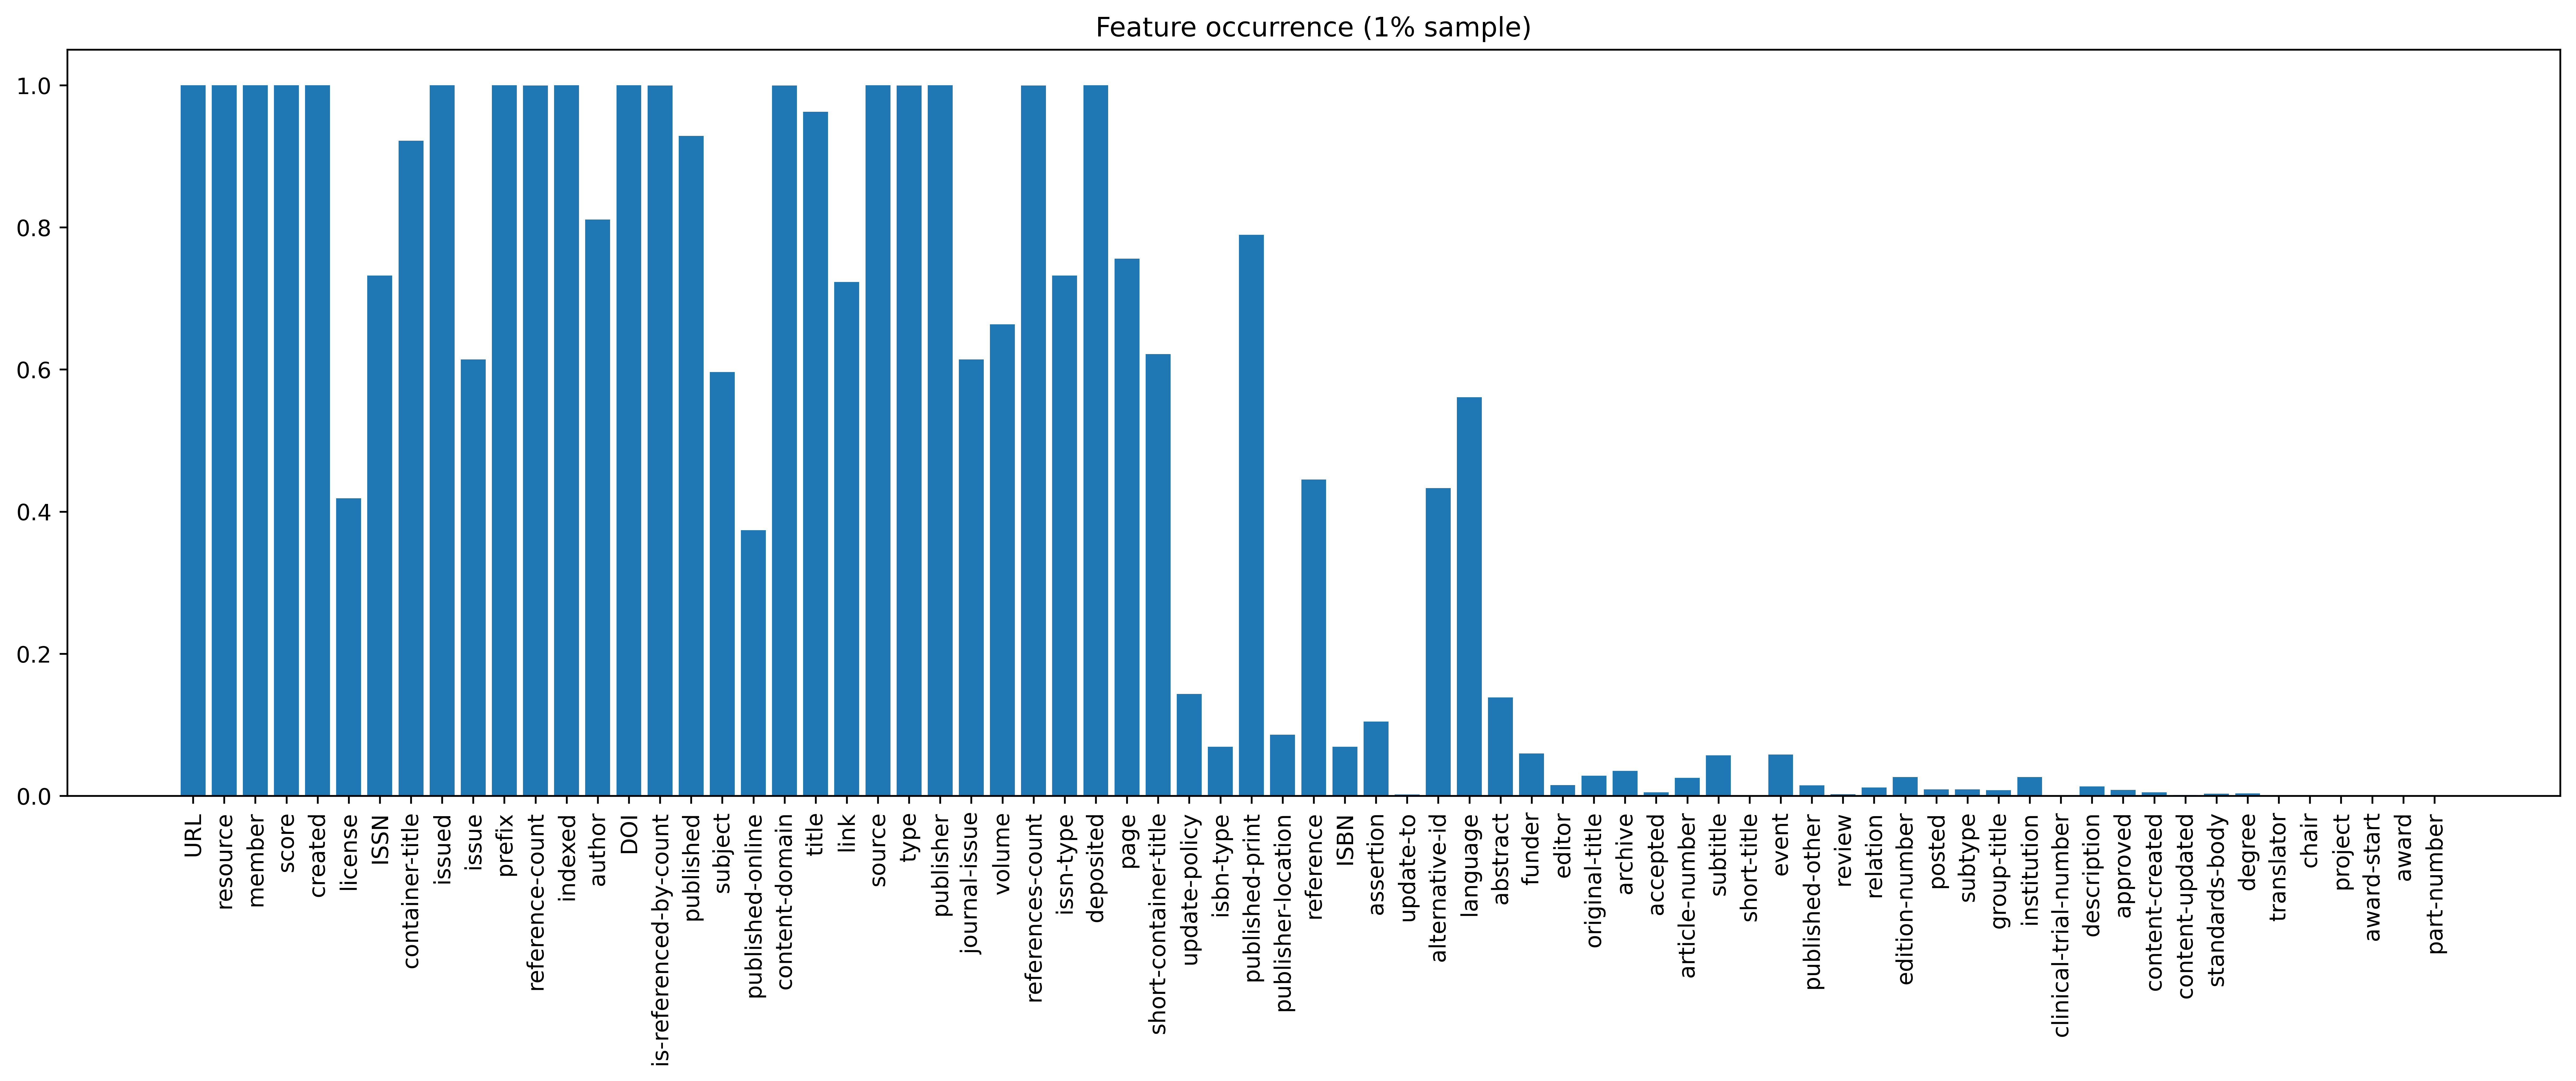

In [17]:
plt.figure(figsize=(20,8))
values = np.array(list(key_counter.get_keys().values()))
plt.bar(key_counter.get_keys().keys(), values/values[0])
plt.xticks(rotation='vertical')
plt.title("Feature occurrence (1% sample)")

plt.subplots_adjust(bottom=0.3)

plt.savefig("/home/wasserstoff/Downloads/test.png", dpi=500)
plt.show()

In [5]:
file_path = os.path.join(input_path, file_names[0])
now = datetime.datetime.now()
with gzip.open(file_path, "r") as file:
    data = json.loads(file.read())
print(datetime.datetime.now()-now)

0:00:00.680630


In [23]:
with_abstract = [paper for paper in data["items"] if "abstract" in paper]
with_abstract[0]

{'abstract': '<jats:p />',
 'URL': 'http://dx.doi.org/10.5840/praxis20192211',
 'resource': {'primary': {'URL': 'http://www.pdcnet.org/oom/service?url_ver=Z39.88-2004&rft_val_fmt=&rft.imuse_id=praxis_2019_0002_0002_0113_0114&svc_id=info:www.pdcnet.org/collection'}},
 'member': '3884',
 'score': 0.0,
 'created': {'date-parts': [[2022, 5, 7]],
  'date-time': '2022-05-07T05:00:57Z',
  'timestamp': 1651899657000},
 'ISSN': ['2576-2966'],
 'container-title': ['Praxis: An Interdisciplinary Journal of Faith and Justice'],
 'issued': {'date-parts': [[2019]]},
 'issue': '2',
 'prefix': '10.5840',
 'reference-count': 0,
 'indexed': {'date-parts': [[2022, 5, 7]],
  'date-time': '2022-05-07T05:41:48Z',
  'timestamp': 1651902108859},
 'author': [{'given': 'Jeff',
   'family': 'Gingerich',
   'sequence': 'first',
   'affiliation': []},
  {'given': 'Nicholas',
   'family': 'Rademacher',
   'sequence': 'additional',
   'affiliation': []},
  {'name': 'Philosophy Documentation Center',
   'sequence': 'a

In [33]:
dates = KeyCounter()
mb = progress_bar(file_names[:1000])
for file_name in mb:
    file_path = os.path.join(input_path, file_name)
    with gzip.open(file_path, "r") as file:
        data = json.loads(file.read())
        for paper in data["items"]:
            if "published" in paper:
                dates.add_key(paper["published"]['date-parts'][0][0])

In [43]:
total = 0
for k in dates._keys:
    total += dates._keys[k]

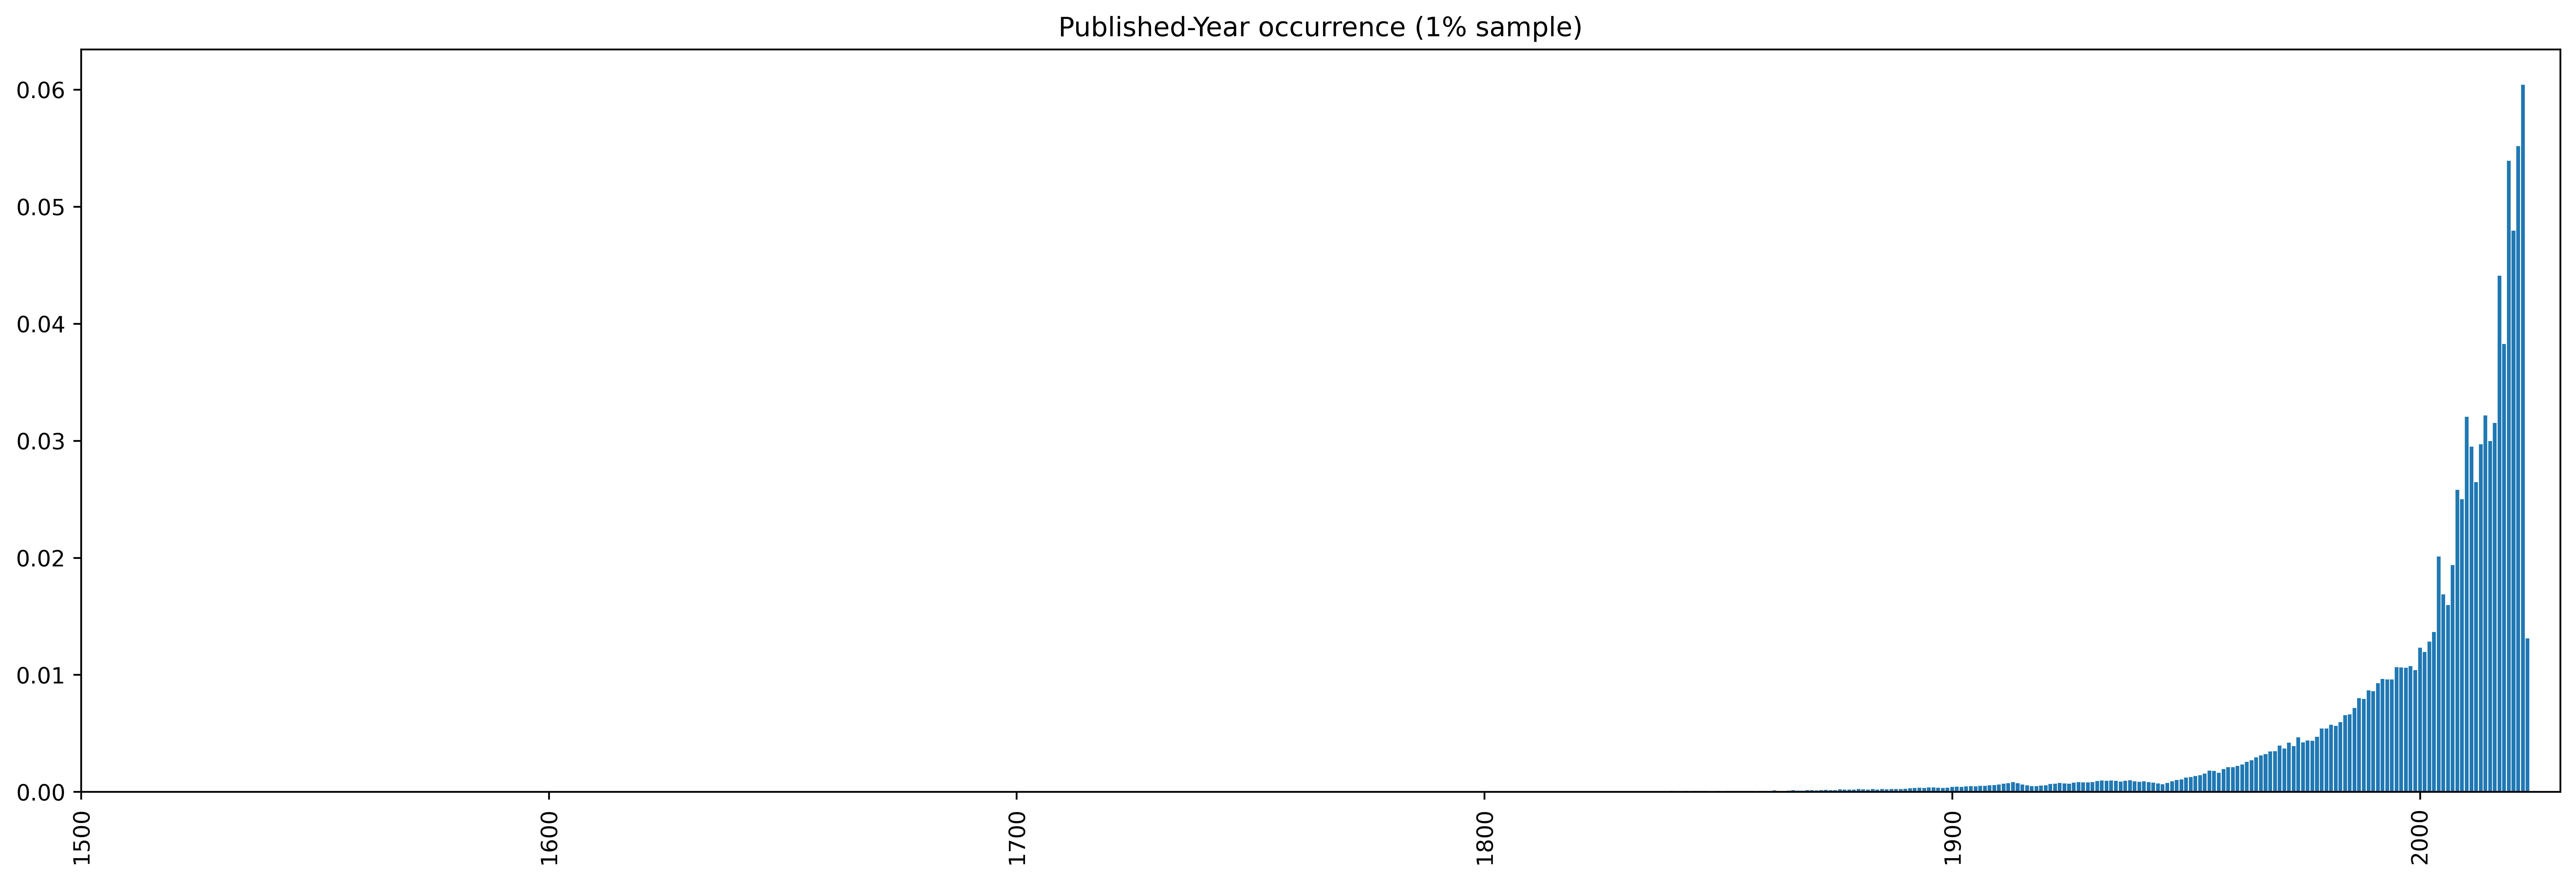

In [44]:
plt.figure(figsize=(20,8))
date_list = np.array(list(dates.get_keys().keys()))
values = np.array(list(dates.get_keys().values()))
plt.bar(dates.get_keys().keys(), values/total)
plt.xticks(rotation='vertical')
plt.title("Published-Year occurrence (1% sample)")
plt.xlim(1500,2030)
plt.subplots_adjust(bottom=0.3)

plt.savefig("/home/wasserstoff/Downloads/test.png", dpi=500)
plt.show()

In [40]:
dates.get_keys()

{2022: 280421,
 2019: 250232,
 2017: 204685,
 2021: 256090,
 2020: 222603,
 2018: 177637,
 2016: 146270,
 2007: 89988,
 2014: 149227,
 2011: 136898,
 2023: 60881,
 2015: 139130,
 2009: 116114,
 2013: 137877,
 1994: 44519,
 2001: 55449,
 1997: 49176,
 2008: 119764,
 2012: 122827,
 1991: 43046,
 2000: 57118,
 2010: 148751,
 1959: 9722,
 1972: 19519,
 1998: 49867,
 1945: 3040,
 1999: 48233,
 1967: 14929,
 1969: 16154,
 1947: 4124,
 1988: 36807,
 1985: 30731,
 1928: 3744,
 1992: 44763,
 1955: 8363,
 2002: 59581,
 1964: 12567,
 1949: 4913,
 1978: 21816,
 1989: 40246,
 1968: 16025,
 1966: 14389,
 1993: 44585,
 1983: 27658,
 1996: 49358,
 1971: 17164,
 1974: 21616,
 1980: 25122,
 2003: 63394,
 1951: 5847,
 1965: 13696,
 1986: 33224,
 1954: 7253,
 1981: 26543,
 1952: 6248,
 1995: 49486,
 1975: 19585,
 1973: 18099,
 1982: 26175,
 1990: 39948,
 1946: 3550,
 1977: 20231,
 1950: 5691,
 1948: 4713,
 1956: 8272,
 2006: 74098,
 1984: 30360,
 1953: 6593,
 1963: 11866,
 1960: 9766,
 1976: 20325,
 1962: